In [1]:
#****************************************************************************************************************#
# Implementación de circuito Cuántico de Generación de Numéros Aleatorios (QRNG) en la plataforma Qiskit de IBM.
#****************************************************************************************************************#

#****************************************************************************************************************#
# Para esta implementación se ha tenido en cuenta la descripción del circuito dada en el siguiente tutorial:
# https://quantumcomputinguk.org/tutorials/qrng-web-application 
#****************************************************************************************************************#

#****************************************************************************************************************#
# Computación Cuántica
# Prof. Gustavo Patino (adolfo.patino@udea.edu.co)
# Facultad de Ingeniería
# Universidad de Antioquia
# Medellin, Colombia
# Febrero, 2023
#****************************************************************************************************************#

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor

# Loading your IBM Quantum account(s)
IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [4]:
min = -100
max = 100

In [5]:
provider = IBMQ.get_provider(hub='ibm-q-education', group='uni-antioquia-2', project='quantum-alg')
#provider.backends()

In [6]:
#backend =provider.get_backend('ibm_nairobi')
backend = Aer.get_backend('aer_simulator')
#backend = provider.get_backend("ibmq_qasm_simulator")

In [7]:
num_q = 24

q = QuantumRegister(num_q, 'q')
c = ClassicalRegister(num_q, 'c')

circuit = QuantumCircuit(q, c)
#circuit.draw('mpl')

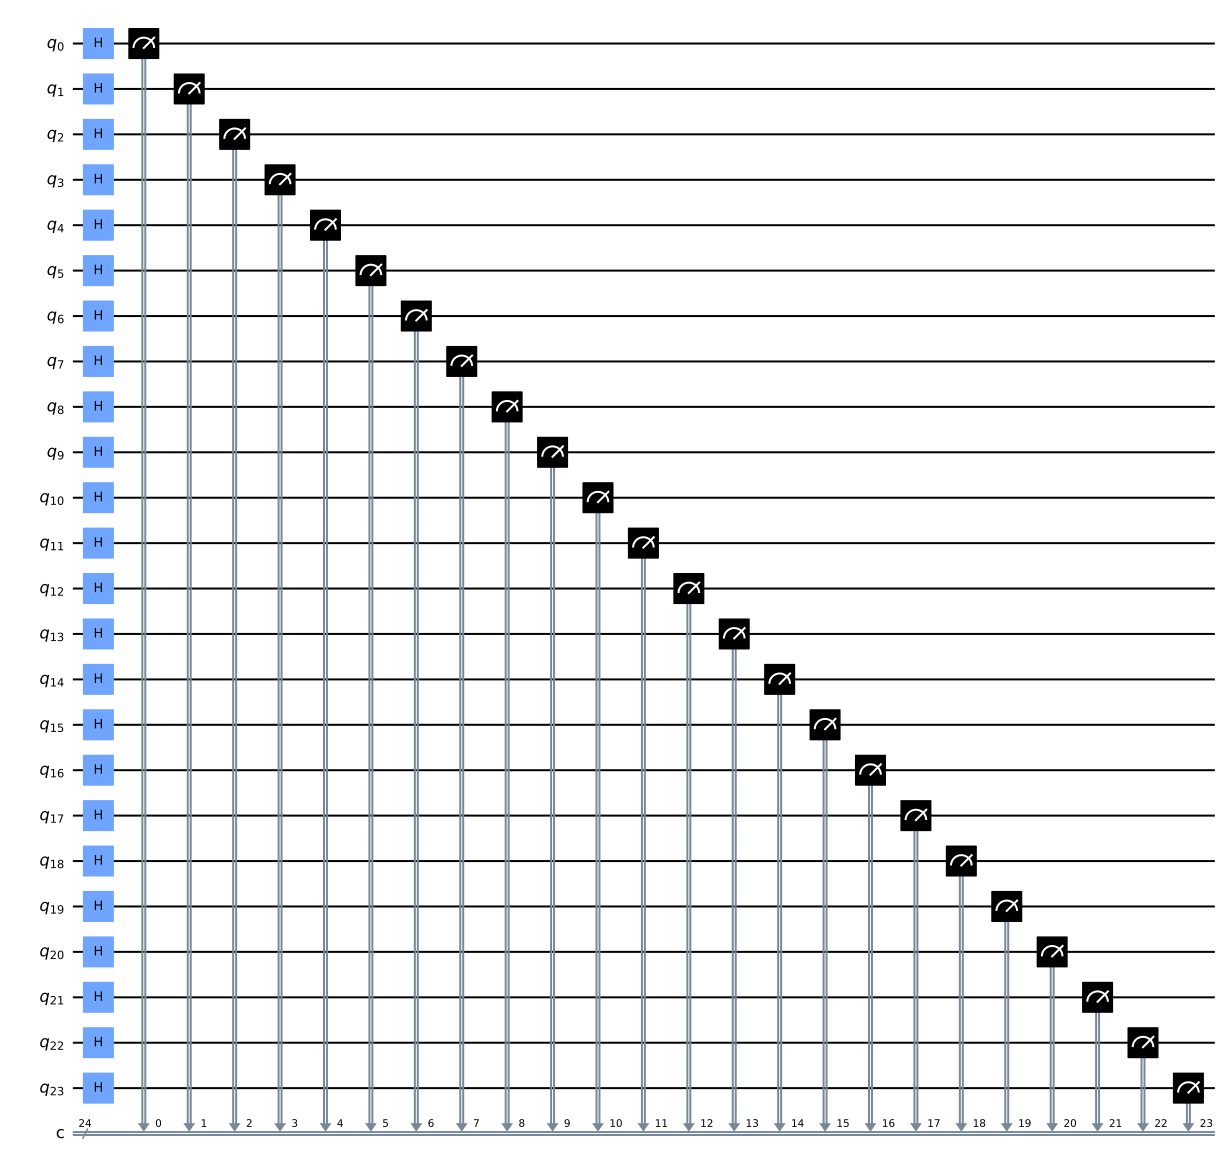

In [8]:
circuit.h(q)  # Applies hadamard gate to all qubits
circuit.measure(q, c)  # Measures all qubits

circuit.draw('mpl')

In [9]:
job = execute(circuit, backend, shots=1)
print('Ejecutando el circuito (job) en IBM ...\n')

Ejecutando el circuito (job) en IBM ...



In [10]:
#job_monitor(job)

In [11]:
conteos = job.result().get_counts()
print('Conteo de resultados por cada medida: ', conteos, '\n')

Conteo de resultados por cada medida:  {'111000000110110100111011': 1} 



In [12]:
#plot_histogram(conteos,figsize=(20,20), filename="histo.png")

In [13]:
#print(conteos.most_frequent())

In [14]:
resultado = int(conteos.most_frequent(), 2) #https://www.programiz.com/python-programming/methods/built-in/int
print('El resultado binario como un entero decimal es: ', resultado, '\n')

El resultado binario como un entero decimal es:  14708027 



In [15]:
resultado_aleat = min + resultado % ((max+1) - min)
print('El numero aleatorio entre',min ,'y',max, 'es:', resultado_aleat, '\n')

El numero aleatorio entre -100 y 100 es: -47 



In [16]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright